In [1]:
# Dependencies.
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

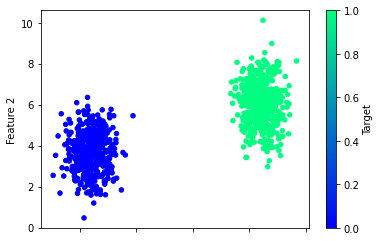

In [2]:
# Generate the dummy dataset.
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create a DataFrame from the dummy data.
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
# Add the target variable column.
df['Target'] = y

# Plot data.
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Scale the data, start with instance creation.
X_scaler = skl.preprocessing.StandardScaler()

# Fit scaler.
X_scaler.fit(X_train)

# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create Keras Sequential model.
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer.
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
# Create the Dense output layer, with probability activation function.
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# Check the structure of the Sequential model.
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics.
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit the model to the training data.
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 434us/step - loss: 0.7269 - accuracy: 0.4587
Epoch 2/100
24/24 [==============================] - 0s 434us/step - loss: 0.7161 - accuracy: 0.2907
Epoch 3/100
24/24 [==============================] - 0s 390us/step - loss: 0.7082 - accuracy: 0.3707
Epoch 4/100
24/24 [==============================] - 0s 390us/step - loss: 0.7019 - accuracy: 0.4427
Epoch 5/100
24/24 [==============================] - 0s 434us/step - loss: 0.6964 - accuracy: 0.4947
Epoch 6/100
24/24 [==============================] - 0s 434us/step - loss: 0.6910 - accuracy: 0.5547
Epoch 7/100
24/24 [==============================] - 0s 434us/step - loss: 0.6851 - accuracy: 0.6027
Epoch 8/100
24/24 [==============================] - 0s 390us/step - loss: 0.6785 - accuracy: 0.6413
Epoch 9/100
24/24 [==============================] - 0s 390us/step - loss: 0.6707 - accuracy: 0.6867
Epoch 10/100
24/24 [==============================] - 0s 434us/step - loss: 0.6610 - accura

24/24 [==============================] - 0s 390us/step - loss: 0.1139 - accuracy: 0.9987
Epoch 82/100
24/24 [==============================] - 0s 434us/step - loss: 0.1118 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 390us/step - loss: 0.1098 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 390us/step - loss: 0.1078 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 434us/step - loss: 0.1059 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 390us/step - loss: 0.1040 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 390us/step - loss: 0.1022 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 390us/step - loss: 0.1004 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 434us/step - loss: 0.0986 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 390us/step - loss: 0.0969 - accuracy: 

<AxesSubplot:>

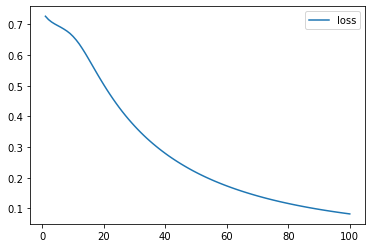

In [11]:
# Create a DataFrame to contain the training history.
hist_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss.
hist_df.plot(y='loss')

<AxesSubplot:>

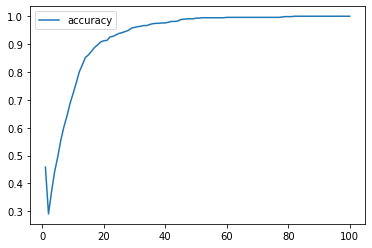

In [12]:
# Plot the accuracy with the same DF.
hist_df.plot(y='accuracy')

In [13]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0828 - accuracy: 1.0000
Loss: 0.08280831575393677, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data.
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
# Use same trained scaling method.
new_X_scaled = X_scaler.transform(new_X)
# Predict the classification, using 50% cut-off.
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [15]:
# Compare to new_y.
model_loss, model_accuracy = nn_model.evaluate(new_X_scaled, new_y, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.0781 - accuracy: 1.0000
Loss: 0.0780855268239975, Accuracy: 1.0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

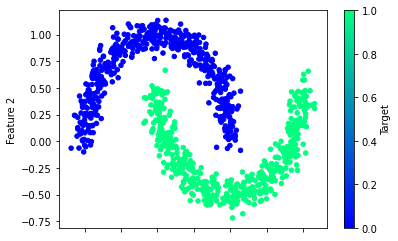

In [20]:
# Create new dummy data in shape of moons.
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transform the y_moons data to a vertical vector.
y_moons = y_moons.reshape(-1, 1)

# Create a DataFrame to plot the nonlinear data.
df = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df['Target'] = y_moons

# Plot the data.
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [22]:
# Split the data.
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scalar instance.
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler.
X_moon_scaler.fit(X_moon_train)

# Scale data.
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Train the model with the nonlinear data.
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 649us/step - loss: 1.0783 - accuracy: 0.4613
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 0.9328 - accuracy: 0.4920
Epoch 3/100
24/24 [==============================] - 0s 607us/step - loss: 0.8346 - accuracy: 0.5240
Epoch 4/100
24/24 [==============================] - 0s 607us/step - loss: 0.7679 - accuracy: 0.5387
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.7165 - accuracy: 0.5640
Epoch 6/100
24/24 [==============================] - 0s 607us/step - loss: 0.6751 - accuracy: 0.5867
Epoch 7/100
24/24 [==============================] - 0s 673us/step - loss: 0.6402 - accuracy: 0.5987
Epoch 8/100
24/24 [==============================] - 0s 650us/step - loss: 0.6106 - accuracy: 0.6200
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.5845 - accuracy: 0.6387
Epoch 10/100
24/24 [==============================] - 0s 650us/step - loss: 0.5616 - accura

24/24 [==============================] - 0s 650us/step - loss: 0.2654 - accuracy: 0.8880
Epoch 82/100
24/24 [==============================] - 0s 607us/step - loss: 0.2650 - accuracy: 0.8867
Epoch 83/100
24/24 [==============================] - 0s 607us/step - loss: 0.2647 - accuracy: 0.8867
Epoch 84/100
24/24 [==============================] - 0s 607us/step - loss: 0.2642 - accuracy: 0.8880
Epoch 85/100
24/24 [==============================] - 0s 650us/step - loss: 0.2639 - accuracy: 0.8867
Epoch 86/100
24/24 [==============================] - 0s 650us/step - loss: 0.2635 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 607us/step - loss: 0.2631 - accuracy: 0.8880
Epoch 88/100
24/24 [==============================] - 0s 650us/step - loss: 0.2628 - accuracy: 0.8880
Epoch 89/100
24/24 [==============================] - 0s 650us/step - loss: 0.2625 - accuracy: 0.8880
Epoch 90/100
24/24 [==============================] - 0s 607us/step - loss: 0.2621 - accuracy: 

<AxesSubplot:>

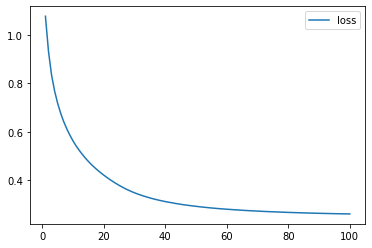

In [24]:
# Create training history DF.
hist_df = pd.DataFrame(model_moon.history, index=range(1, len(model_moon.history["loss"])+1))

# Plot loss.
hist_df.plot(y='loss')

<AxesSubplot:>

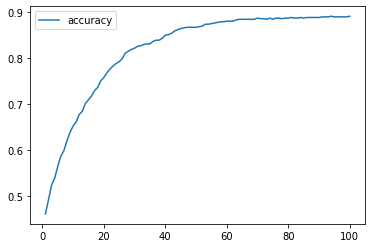

In [25]:
# Plot accuracy.
hist_df.plot(y='accuracy')